# 2 Arms exploration

On this notebook we explore and extract the results when applying linUCB with a 0-1 rewards with different alphas 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_1 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
def Multiple_Runs(Times, Data, Features, Reward, Alpha):
    Feat_Mult = {}
    Mark_Mult = {}
    Paths_Mult = {}
    Align_Mult = {}
    Features_Arms_Mult = {}
    for x in range(Times):
        Feat_Mult["Feat{0}_Mult".format(x)] = {}
        Mark_Mult["Mark{0}_Mult".format(x)] = {}
        Paths_Mult["Path{0}_Mult".format(x)] = {}
        Align_Mult["Alig{0}_Mult".format(x)] = {}
        Features_Arms_Mult["Feat{0}_Mult".format(x)] = {}
        
    Times_ArmsChosen_Mult = []
    
    Mean_Reward = []
    Mean_RewardArms = []

    for k in range(Times):
        Paths, Times_Aligned, Arms_Rewards, Aligned_Reward, UCB_Object, Times_ArmsChosen, Mark_dic, Features_dic = LinUCB_Algorithm(Data, Alpha, Features, Reward)
                   
        Mark_Mult["Mark{0}_Mult".format(k)] = Mark_dic
        Feat_Mult["Feat{0}_Mult".format(k)] = Features_dic
        Paths_Mult["Path{0}_Mult".format(k)] = Paths
        Align_Mult["Alig{0}_Mult".format(k)] = Aligned_Reward
            
        Mean_Reward.append(np.mean([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)]))
        Mean_RewardArms.append([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)])
        Times_ArmsChosen_Mult.append(Times_ArmsChosen)
        
    return Paths_Mult, Align_Mult, Mean_Reward, Mean_RewardArms, Mark_Mult, Feat_Mult, Times_ArmsChosen_Mult

## Exploration which ID to select

In [3]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

In [5]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64


In [6]:
Check_ABTestId(data_big3)

ID: 3350
	Total:  1381702
	NGU: 1237183
	Non-NGU: 144519
	Num Arms: 3
ID: 3301
	Total:  776402
	NGU: 743103
	Non-NGU: 33299
	Num Arms: 2
ID: 3331
	Total:  717633
	NGU: 670986
	Non-NGU: 46647
	Num Arms: 2
ID: 3292
	Total:  706119
	NGU: 627391
	Non-NGU: 78728
	Num Arms: 2
ID: 3346
	Total:  655856
	NGU: 550667
	Non-NGU: 105189
	Num Arms: 3
ID: 3307
	Total:  413295
	NGU: 390729
	Non-NGU: 22566
	Num Arms: 2

Unique A/B: [3292 3301 3307 3331 3346 3350]


### Define ID + features + dataset reduction 

In [22]:
Test_ID_big = 3301
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
print(DataDef.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
print("Before: ", DataDef.shape[1])
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
print("After: ", DataDef_cat.shape[1])
ats = DataDef_cat.head(int(DataDef.shape[0]/2)) #Es 7
print("Number of users:", ats.shape[0])
print("\nProportion of each arm:")
print(ats.ab_test_experience_id.value_counts(normalize = True))

(743103, 30)
Before:  30
After:  32
Number of users: 371551

Proportion of each arm:
0    0.50097
1    0.49903
Name: ab_test_experience_id, dtype: float64


In [23]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "iap_revenue_d1"
Arms = np.unique(ats.ab_test_experience_id).shape[0]
Alpha = 1
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: iap_revenue_d1
	Number of Arms: 2
	Alpha: 1
	Num of Features: 6


In [25]:
Paths_d7p_A1_Big, Aligns_d7p_A1_Big, Mean_Reward_d7p_A1_Big, Mean_RewardArms_d7p_A1_Big, Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big, Times_ArmsChosen_d7p_A1_Big = Multiple_Runs(Times = 2, Data = ats, Features = Features, Reward = Reward, Alpha = Alpha)

100%|█████████████████████████████████████████████████████████████████████████| 371551/371551 [22:59<00:00, 269.30it/s]


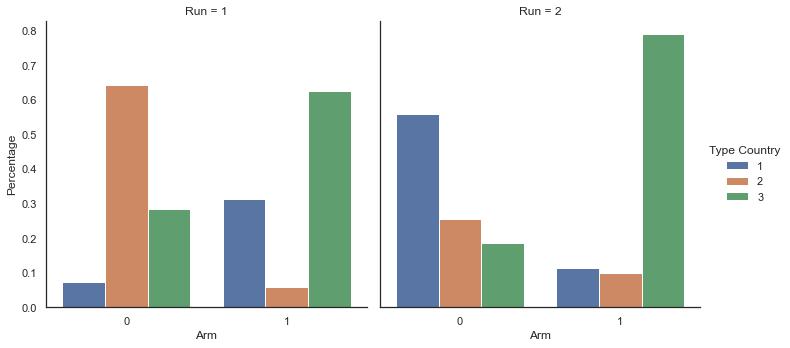

In [314]:
PlotFeaturesArm_2_Country(Feat_Mult_d7p_A1_Big)

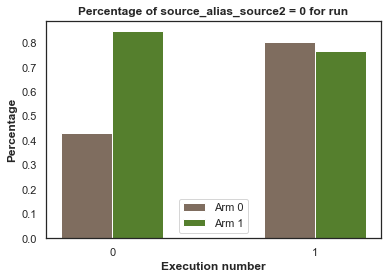

In [140]:
PlotFeaturesArm_2(Feat_Mult_d7p_A1_Big, Alpha, Reward = "source_alias_source2")

In [ ]:
PlotFeaturesArm_2(Feat_Mult_d7p_A1_Big, Alpha, Reward = "platform_alias_platform2")

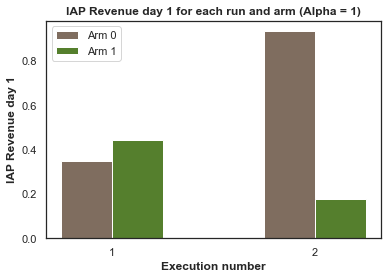

In [141]:
PerformanceArm2(Mean_RewardArms_d7p_A1_Big, Alpha, Reward)

0.4279478357792169
0.4760207750701093


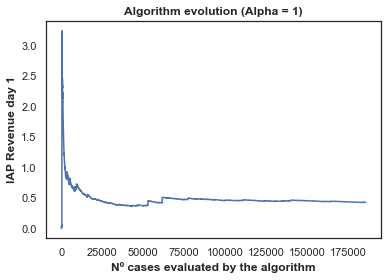

In [142]:
print(np.mean(Aligns_d7p_A1_Big["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A1_Big, 0, Reward, Alpha)

0.4533892414157035
0.480956116587463


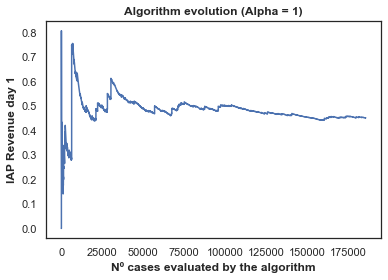

In [143]:
print(np.mean(Aligns_d7p_A1_Big["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A1_Big, 1, Reward, Alpha)

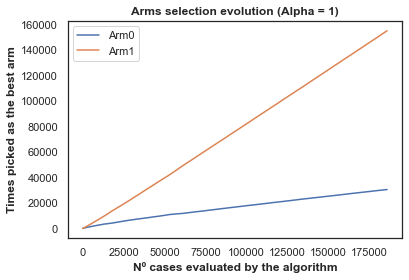

In [144]:
Plot_ArmsSelection(Paths_d7p_A1_Big, 0, Alpha)

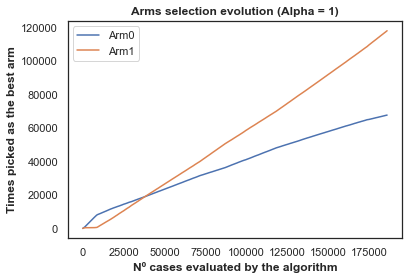

In [145]:
Plot_ArmsSelection(Paths_d7p_A1_Big, 1, Alpha)

Times each arm is chosen: [ 49096.5 136618.5]
Proportion source_alias_source2 equals 0 for arm 0 is: 38.274787843241
Proportion source_alias_source2 equals 0 for arm 1 is: 19.45963701881946


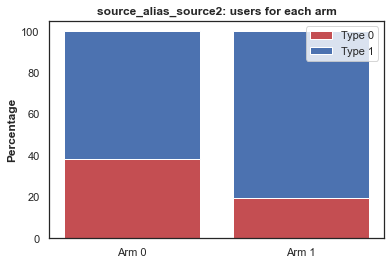

Proportion platform_alias_platform2 equals 0 for arm 0 is: 65.30070720444829
Proportion platform_alias_platform2 equals 0 for arm 1 is: 85.02587295273624


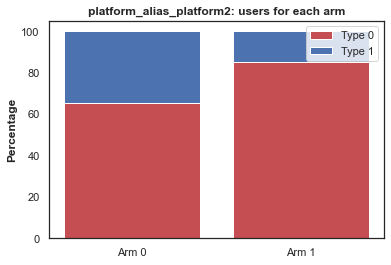

Proportion country for arm 0 is: [0.31648637 0.44836017 0.23515345]
Proportion country for arm 1 is: [0.21361451 0.07907945 0.70730604]


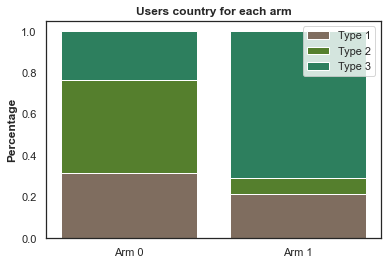

In [146]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d7p_A1_Big, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big)
Plot1("platform_alias_platform2", Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big)
Plot2_2arms(Mark_Mult_d7p_A1_Big, Feat_Mult_d7p_A1_Big)

### Alpha = 5

In [147]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "iap_revenue_d1"
Arms = np.unique(ats.ab_test_experience_id).shape[0]
Alpha = 5
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: iap_revenue_d1
	Number of Arms: 2
	Alpha: 5
	Num of Features: 6


In [148]:
Paths_d7p_A5_Big, Aligns_d7p_A5_Big, Mean_Reward_d7p_A5_Big, Mean_RewardArms_d7p_A5_Big, Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big, Times_ArmsChosen_d7p_A5_Big = Multiple_Runs(Times = 2, Data = ats, Features = Features, Reward = Reward, Alpha = Alpha)

100%|█████████████████████████████████████████████████████████████████████████| 371551/371551 [27:08<00:00, 228.12it/s]


In [153]:
np.mean(ats[Reward])

0.44740718999488926

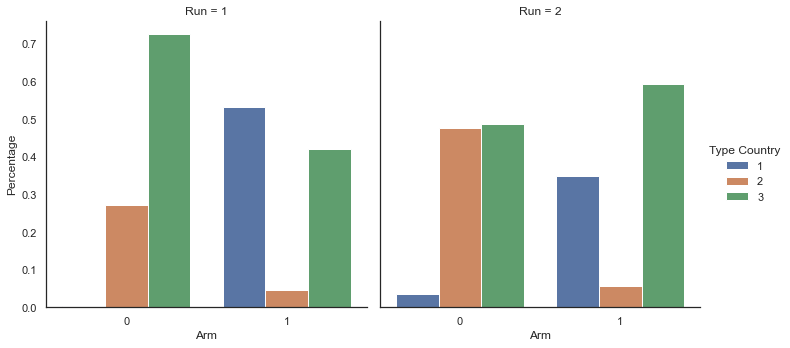

In [313]:
PlotFeaturesArm_2_Country(Feat_Mult_d7p_A5_Big)

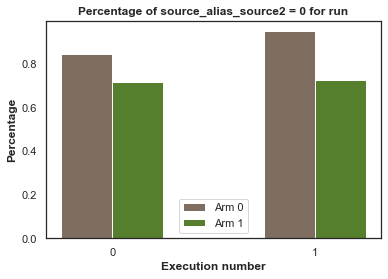

In [149]:
PlotFeaturesArm_2(Feat_Mult_d7p_A5_Big, Alpha, Reward = "source_alias_source2")

In [ ]:
PlotFeaturesArm_2(Feat_Mult_d7p_A5_Big, Alpha, Reward = "platform_alias_platform2")

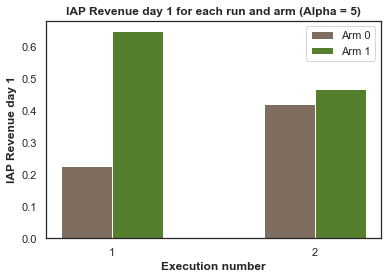

In [150]:
PerformanceArm2(Mean_RewardArms_d7p_A5_Big, Alpha, Reward)

0.44430600723531205
0.402647463722692


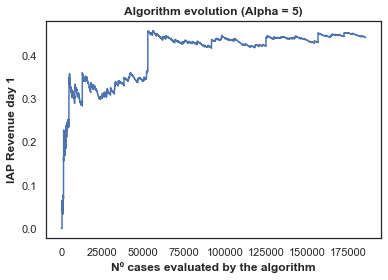

In [151]:
print(np.mean(Aligns_d7p_A5_Big["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A5_Big, 0, Reward, Alpha)

0.4552656942856953
0.4690701710092475


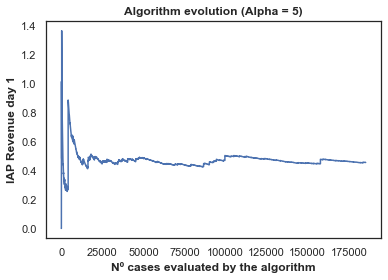

In [152]:
print(np.mean(Aligns_d7p_A5_Big["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d7p_A5_Big, 1, Reward, Alpha)

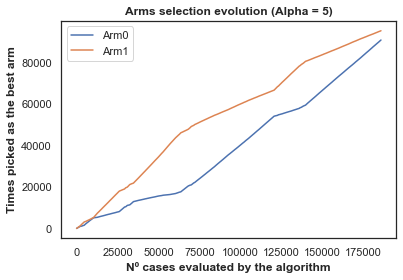

In [154]:
Plot_ArmsSelection(Paths_d7p_A5_Big, 0, Alpha)

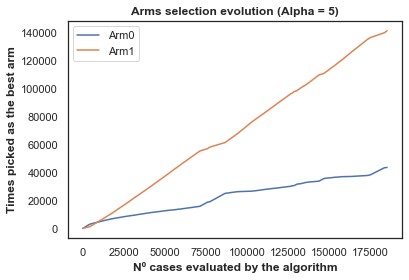

In [155]:
Plot_ArmsSelection(Paths_d7p_A5_Big, 1, Alpha)

Times each arm is chosen: [ 67209. 118425.]
Proportion source_alias_source2 equals 0 for arm 0 is: 10.3801236939667
Proportion source_alias_source2 equals 0 for arm 1 is: 27.92629683541114


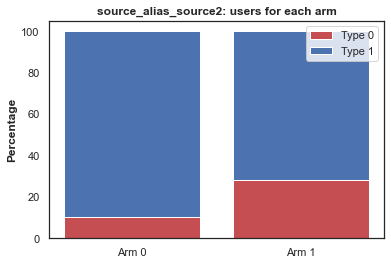

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.85621527404697
Proportion platform_alias_platform2 equals 0 for arm 1 is: 72.08699561478909


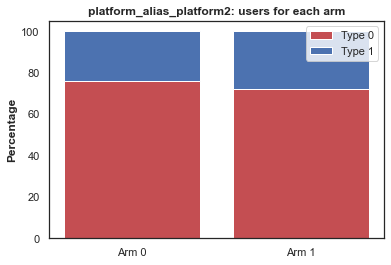

Proportion country for arm 0 is: [0.01952018 0.37387165 0.60660817]
Proportion country for arm 1 is: [0.44125851 0.05087426 0.50786723]


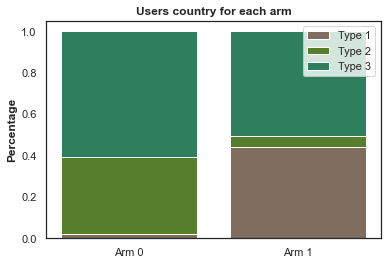

In [156]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d7p_A5_Big, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big)
Plot1("platform_alias_platform2", Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big)
Plot2_2arms(Mark_Mult_d7p_A5_Big, Feat_Mult_d7p_A5_Big)

# 4 Arms

In [161]:
dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [162]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [163]:
Check_ABTestId(data_big2)

ID: 3495
	Total:  486295
	NGU: 324780
	Non-NGU: 161515
	Num Arms: 3
ID: 3552
	Total:  458911
	NGU: 441625
	Non-NGU: 17286
	Num Arms: 2
ID: 3582
	Total:  301515
	NGU: 289806
	Non-NGU: 11709
	Num Arms: 4
ID: 3473
	Total:  285731
	NGU: 277557
	Non-NGU: 8174
	Num Arms: 4
ID: 3457
	Total:  247844
	NGU: 240962
	Non-NGU: 6882
	Num Arms: 4
ID: 3454
	Total:  245962
	NGU: 239217
	Non-NGU: 6745
	Num Arms: 2
ID: 3565
	Total:  225935
	NGU: 190529
	Non-NGU: 35406
	Num Arms: 2
ID: 3420
	Total:  184148
	NGU: 175281
	Non-NGU: 8867
	Num Arms: 2
ID: 3507
	Total:  163803
	NGU: 134055
	Non-NGU: 29748
	Num Arms: 4
ID: 3526
	Total:  159849
	NGU: 154586
	Non-NGU: 5263
	Num Arms: 3

Unique A/B: [3420 3454 3457 3473 3495 3507 3526 3552 3565 3582]


### Define ID + features + dataset reduction 

In [218]:
Test_ID_big2 = 3582
NGU = 1
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print(DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
print("Before: ", DataDef2.shape[1])
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)
print("After: ", DataDef_cat2.shape[1])
ats2 = DataDef_cat2.head(int(DataDef_cat2.shape[0])) #Es 2
print("Number of users:", ats2.shape[0])
print("\nProportion of each arm:")
print(ats2.ab_test_experience_id.value_counts(normalize = True))

(289806, 30)
Before:  30
After:  32
Number of users: 289806

Proportion of each arm:
2    0.250654
3    0.250216
1    0.249733
0    0.249398
Name: ab_test_experience_id, dtype: float64


In [219]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "iap_revenue_d1"
Arms = np.unique(ats2.ab_test_experience_id).shape[0]
Alpha = 1
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: iap_revenue_d1
	Number of Arms: 4
	Alpha: 1
	Num of Features: 6


In [220]:
Paths_d1p_A1_Big2, Aligns_d1p_A1_Big2, Mean_Reward_d1p_A1_Big2, Mean_RewardArms_d1p_A1_Big2, Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2, Times_ArmsChosen_d1p_A1_Big2 = Multiple_Runs(Times = 2, Data = ats2, Features = Features, Reward = Reward, Alpha = Alpha)

100%|█████████████████████████████████████████████████████████████████████████| 289806/289806 [11:09<00:00, 432.87it/s]


In [322]:
Times_ArmsChosen_d1p_A1_Big2

[[20634, 16694, 19145, 16115], [25279, 12963, 19068, 15095]]

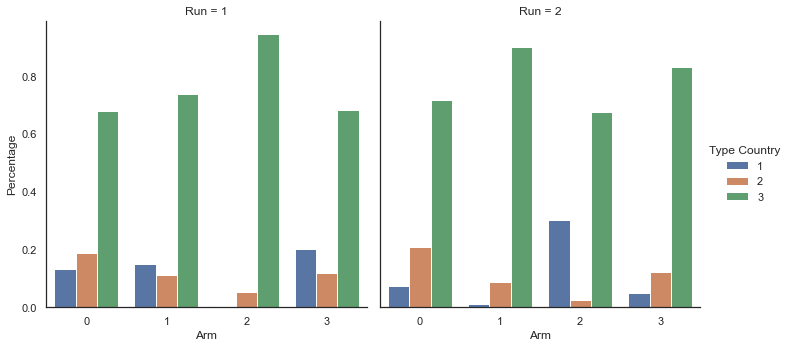

In [233]:
PlotFeaturesArm_4_Country(Feat_Mult_d1p_A1_Big2)

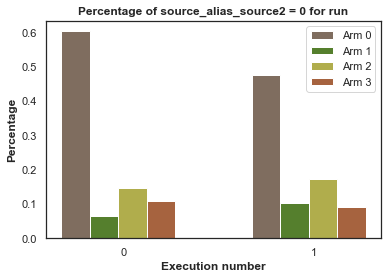

In [273]:
PlotFeaturesArm_4(Feat_Mult_d1p_A1_Big2, Alpha, Reward = "source_alias_source2")

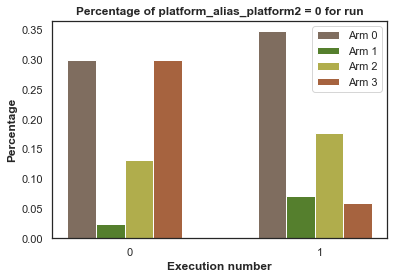

In [274]:
PlotFeaturesArm_4(Feat_Mult_d1p_A1_Big2, Alpha, Reward = "platform_alias_platform2")

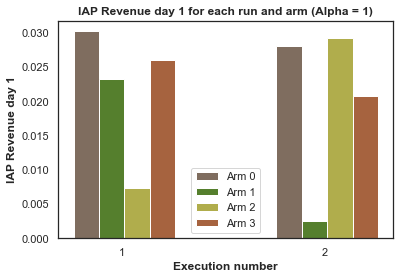

In [293]:
PerformanceArm4(Mean_RewardArms_d1p_A1_Big2, Alpha, Reward)

0.02203846747554791
0.021561989713921845


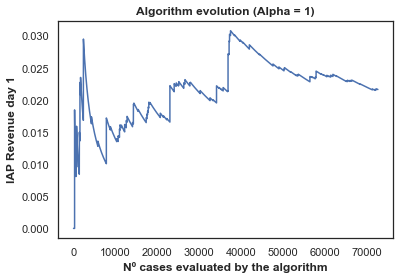

In [294]:
print(np.mean(Aligns_d1p_A1_Big2["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A1_Big2, 0, Reward, Alpha)

0.020649448600990182
0.02154254720565296


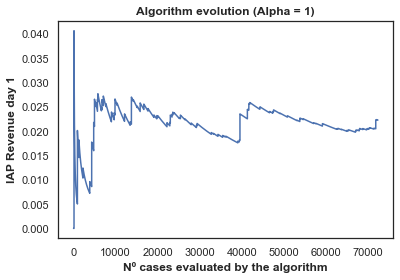

In [295]:
print(np.mean(Aligns_d1p_A1_Big2["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A1_Big2, 1, Reward, Alpha)

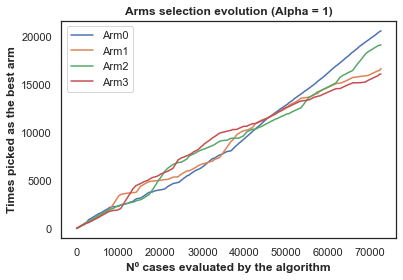

In [296]:
Plot_ArmsSelection(Paths_d1p_A1_Big2, 0, Alpha)

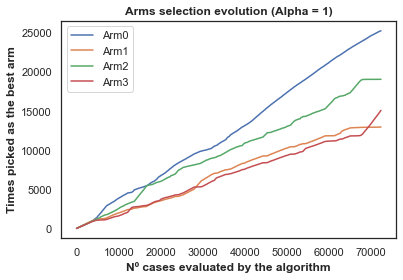

In [297]:
Plot_ArmsSelection(Paths_d1p_A1_Big2, 1, Alpha)

Times each arm is chosen: [22956.5 14828.5 19106.5 15605. ]
Proportion source_alias_source2 equals 0 for arm 0 is: 46.03389852170956
Proportion source_alias_source2 equals 0 for arm 1 is: 91.6438050099636
Proportion source_alias_source2 equals 0 for arm 2 is: 84.07240128181068
Proportion source_alias_source2 equals 0 for arm 3 is: 90.04869431114886


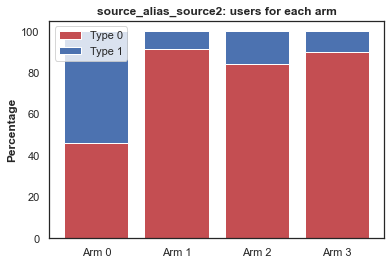

Proportion platform_alias_platform2 equals 0 for arm 0 is: 67.647665678299
Proportion platform_alias_platform2 equals 0 for arm 1 is: 95.30960385168197
Proportion platform_alias_platform2 equals 0 for arm 2 is: 84.58635324297185
Proportion platform_alias_platform2 equals 0 for arm 3 is: 82.08614168964637


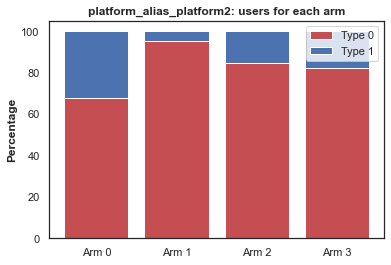

Proportion country for arm 0 is: [0.10395986 0.19697918 0.69906096]
Proportion country for arm 1 is: [0.08015321 0.1002771  0.81956969]
Proportion country for arm 2 is: [0.15240075 0.03805125 0.80954801]
Proportion country for arm 3 is: [0.12420435 0.1203575  0.75543815]


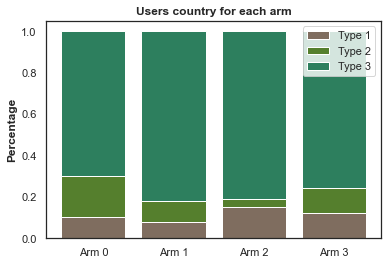

In [298]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d1p_A1_Big2, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2)
Plot1("platform_alias_platform2", Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2)
Plot2_2arms(Mark_Mult_d1p_A1_Big2, Feat_Mult_d1p_A1_Big2)

### Alpha = 5

In [299]:
#Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
#            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "time_played_d1",
#            "iap_revenue_d1", "return_d3", "ad_revenue_d3", "time_played_d3", "iap_revenue_d3"]
#Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Reward = "iap_revenue_d1"
Arms = np.unique(ats2.ab_test_experience_id).shape[0]
Alpha = 5
print("Parameters for following model:")
print("\tReward:", Reward)
print("\tNumber of Arms:", Arms)
print("\tAlpha:", Alpha)
print("\tNum of Features:", len(Features))

Parameters for following model:
	Reward: iap_revenue_d1
	Number of Arms: 4
	Alpha: 5
	Num of Features: 6


In [300]:
Paths_d1p_A5_Big2, Aligns_d1p_A5_Big2, Mean_Reward_d1p_A5_Big2, Mean_RewardArms_d1p_A5_Big2, Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2, Times_ArmsChosen_d1p_A5_Big2 = Multiple_Runs(Times = 2, Data = ats2, Features = Features, Reward = Reward, Alpha = Alpha)

100%|█████████████████████████████████████████████████████████████████████████| 289806/289806 [12:54<00:00, 374.10it/s]


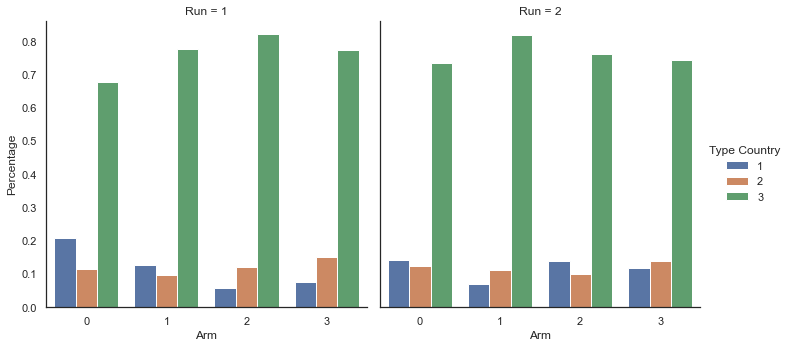

In [312]:
PlotFeaturesArm_4_Country(Feat_Mult_d1p_A5_Big2)

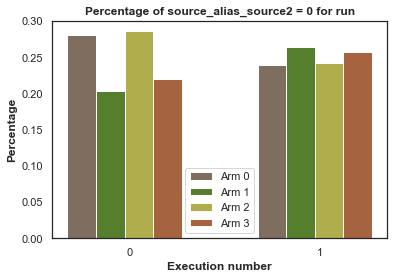

In [302]:
PlotFeaturesArm_4(Feat_Mult_d1p_A5_Big2, Alpha, Reward = "source_alias_source2")

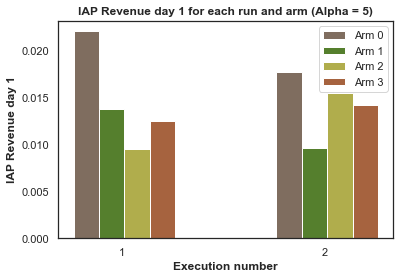

In [306]:
PerformanceArm4(Mean_RewardArms_d1p_A5_Big2, Alpha, Reward)

0.01493891342771933
0.016700338488523373


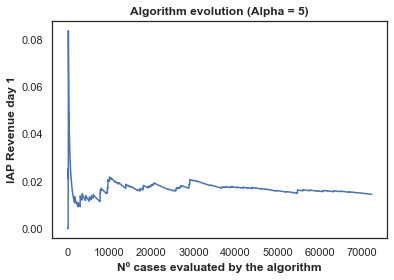

In [307]:
print(np.mean(Aligns_d1p_A5_Big2["Alig0_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A5_Big2, 0, Reward, Alpha)

0.014161824889565099
0.012552478508722445


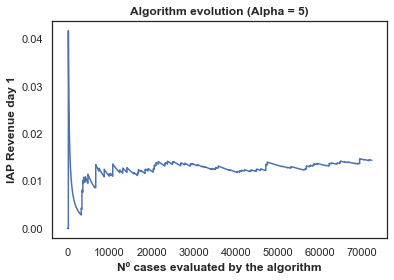

In [308]:
print(np.mean(Aligns_d1p_A5_Big2["Alig1_Mult"][-5000:]))
Plot_AlignRewards(Aligns_d1p_A5_Big2, 1, Reward, Alpha)

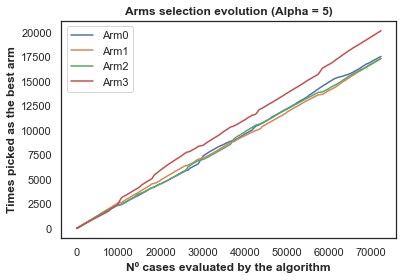

In [309]:
Plot_ArmsSelection(Paths_d1p_A5_Big2, 0, Alpha)

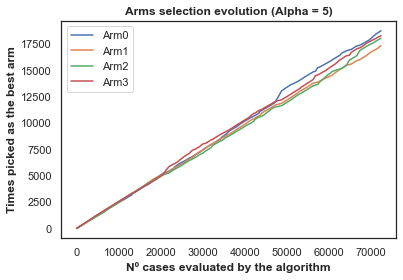

In [310]:
Plot_ArmsSelection(Paths_d1p_A5_Big2, 1, Alpha)

Times each arm is chosen: [18148.5 17332.  17687.  19231.5]
Proportion source_alias_source2 equals 0 for arm 0 is: 74.05985032114103
Proportion source_alias_source2 equals 0 for arm 1 is: 76.651775755364
Proportion source_alias_source2 equals 0 for arm 2 is: 73.60533154638298
Proportion source_alias_source2 equals 0 for arm 3 is: 76.12289184630808


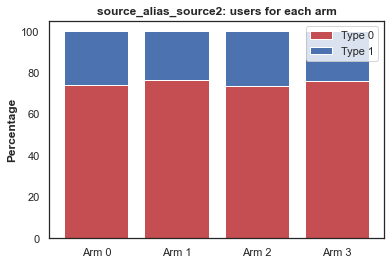

Proportion platform_alias_platform2 equals 0 for arm 0 is: 87.69950452547552
Proportion platform_alias_platform2 equals 0 for arm 1 is: 72.20534895232957
Proportion platform_alias_platform2 equals 0 for arm 2 is: 77.320866799649
Proportion platform_alias_platform2 equals 0 for arm 3 is: 84.93200033002488


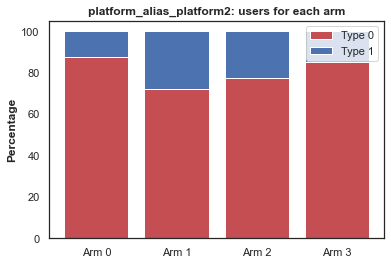

Proportion country for arm 0 is: [0.1748844  0.11945478 0.70566082]
Proportion country for arm 1 is: [0.09924592 0.10357833 0.79717575]
Proportion country for arm 2 is: [0.09829365 0.11137982 0.79032652]
Proportion country for arm 3 is: [0.09609297 0.14640202 0.75750501]


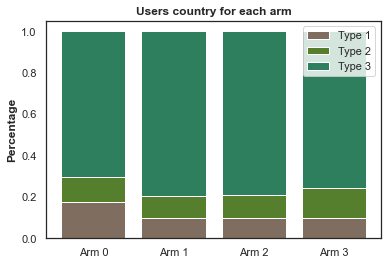

In [311]:
print("Times each arm is chosen:", np.mean(Times_ArmsChosen_d1p_A5_Big2, axis = 0))
Plot1("source_alias_source2", Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)
Plot1("platform_alias_platform2", Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)
Plot2_2arms(Mark_Mult_d1p_A5_Big2, Feat_Mult_d1p_A5_Big2)